# EDA on King County Housing Data 2014-2015

![](https://www.racialequityalliance.org/wp-content/uploads/2016/10/assessors_social-1.jpg)

## Stakeholder
Our stakeholder is Zachary Brooks. He invested in historic houses in the best neighborhoods. He aims for high profits and wonders what the best time throughout the year is to sell his houses. Additionally he thinks about if renovations pay off.

### Historic houses
Since we will focus on historic houses, let's have a look on how to define them.

From wikipedia:

A historic house generally meets several criteria before being listed by an official body as "historic." Generally the building is at least a certain age [generally 60 years], depending on the rules for the individual list. A second factor is that the building be in recognizably the same form as when it became historic. Third is a requirement that either an event of historical importance happened at the site, or that a person of historical significance was associated with the site, or that the building itself is important for its architecture or interior.

So, similarly to the "H" license plate in Germany, a house has to be over 60 years old. Then if the owner decides to go through some bureaucratic obstacles, his house can be classified as historical. Since this is not in our dataset, we will focus on the age of the houses. We define houses aged 60 years or older as **historic**, while we term younger houses as **modern**.

## Data Cleaning
### Import modules and set up plotting

In [ ]:
import warnings
# filter warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# plotly in vs code
import plotly.io as pio
pio.renderers.default = "notebook"

# setting up matplotlib
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (10, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Import the data
We work with the [King County Housing Data from kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv). We load the dataset and print the first five lines:

In [2]:
# Import data and check if importing worked
#df = pd.read_csv('data/kc_house_data.csv')
df = pd.read_csv('data/King_County_House_prices_dataset.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


### Parsing the date
Apparently the date has a wrong format. Both yr_built and yr_renovated are ints but we will consider those later on. To facilitate working with it we parse it to datetime:

In [3]:
df.date = pd.to_datetime(df.date)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


### Understanding the data - Columns
We examine the size of the dataset and find out what information it contains.

In [4]:
df.shape

(21597, 21)

We have 21613 rows and 21 columns in our dataset. What information is contained in the columns?

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

The **Column Names and descriptions for King County Data Set** as posted on kaggle:
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  # of bedrooms
* **bathroomsNumber** - # of bathrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

### Understanding the data - Datatypes and missing values

In [6]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

Looks good! We have missing values for waterfront, view and yr-renovated which we will cover later on. All data is parsed correctly.
* datetime for the date
* float for price, bathrooms, floors, lat and long. It makes sense: We can have half bathrooms and consequently half room counts. For the price and longitude and latitude we expect floats.
* int for the rest makes sense

### Understanding the data - Duplicates
Do we have duplicates in the dataset?

In [8]:
df["id"].duplicated().value_counts()

False    21420
True       177
Name: id, dtype: int64

Indeed we have 177 duplicates in the dataset. Those are probably houses that were resold in that short time period. Perhaps that could give insight if this is lucrative. We keep duplicates.

### Drop columns

Some columns are unnecessary to answer our hypothesis. Therefore we can drop some information. In detail, we neglect the following columns:
* zipcode: we use the coordinates to assign the areas
* room counts: we assume that our stakeholder wants to sell a standard house and we will not consider the influence on room count on the sale price
* footage lot: the correlation is very difficult and beyond the scope of this analysis
* floors and footage for each floor: same as room counts, not considered

In [9]:
columns_to_drop = ['zipcode', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'sqft_lot15']
df.drop(columns_to_drop, axis=1, inplace=True)

### Data statistics

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.000,4580474287.771,2876735715.748,1000102.000,2123049175.000,3904930410.000,7308900490.000,9900000190.000
price,21597.000,540296.574,367368.140,78000.000,322000.000,450000.000,645000.000,7700000.000
sqft_living,21597.000,2080.322,918.106,370.000,1430.000,1910.000,2550.000,13540.000
waterfront,19221.000,0.008,0.087,0.000,0.000,0.000,0.000,1.000
view,21534.000,0.234,0.766,0.000,0.000,0.000,0.000,4.000
condition,21597.000,3.410,0.651,1.000,3.000,3.000,4.000,5.000
grade,21597.000,7.658,1.173,3.000,7.000,7.000,8.000,13.000
yr_built,21597.000,1971.000,29.375,1900.000,1951.000,1975.000,1997.000,2015.000
yr_renovated,17755.000,83.637,399.946,0.000,0.000,0.000,0.000,2015.000
lat,21597.000,47.560,0.139,47.156,47.471,47.572,47.678,47.778


**Correlation with sale price**

Now we look for correlation with sale price.

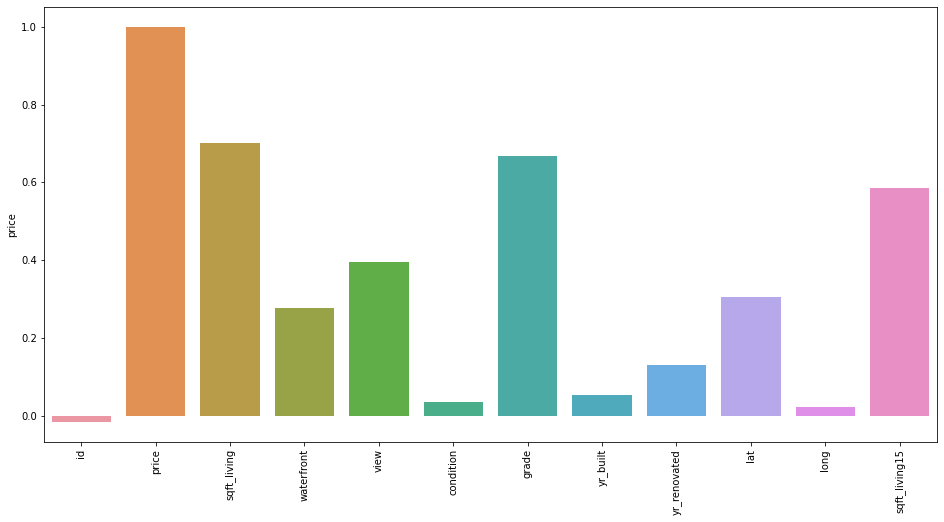

In [11]:
sns.barplot(df.corr().columns, df.corr()['price'])
plt.xticks(rotation=90);

So the price is correlated with the living area sqft_living, the grade but also the living area of the neighboring houses.

## Hypothesis generation



1. Sale prices depend on house age. While we expect a price decreases for older houses, historical houses again increase in value.
1. For an investor, renovations pay off especially for historic houses.
1. Sale prices vary over the year. Therefore seasonal buying and selling pays off.
1. Historic houses are clustered in more expensive neighborhoods. One is located in downtown Seattle.

## Exploring the data
What is the distribution of our target? What are the distributions of the features? Do we have outliers?
### Sale price distribution
First we look on the distribution of the sale prices:

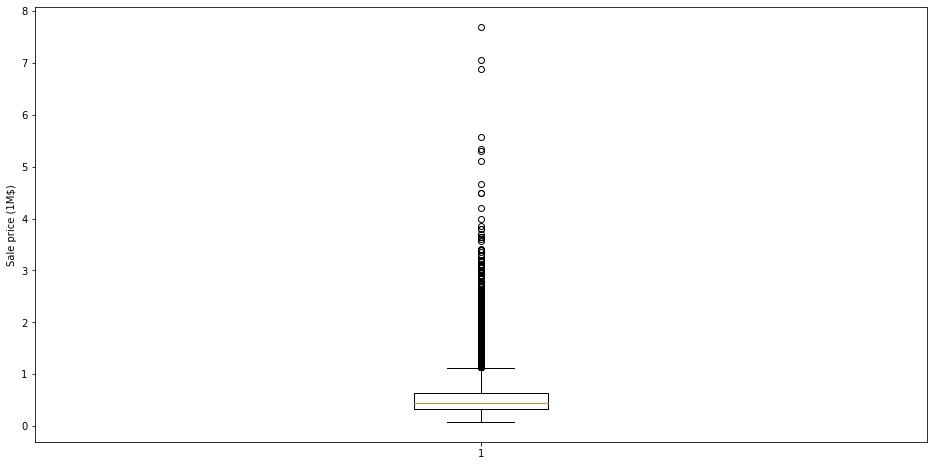

In [12]:
plt.boxplot(df.price/1e6)
plt.ylabel('Sale price (1M\$)');

We have most of our data between 0 and 1 million USD with some outliers up to around 8 million. To get a better idea of the main part of the data, we hide the outliers:

450000.0

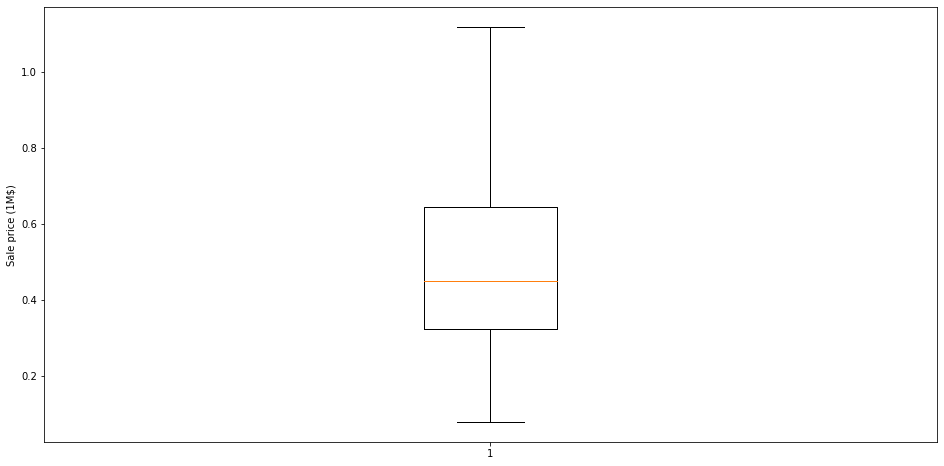

In [13]:
plt.boxplot(df.price/1e6,showfliers=False)
plt.ylabel('Sale price (1M\$)')
df.price.median()

The distribution is skewed right with most of the houses sold between 300k and 600k with the median at 450k. We have very few outliers with very high sale prices. In order to obtain a nice distribution, we remove the outliers.

We look at the distributions of the features.

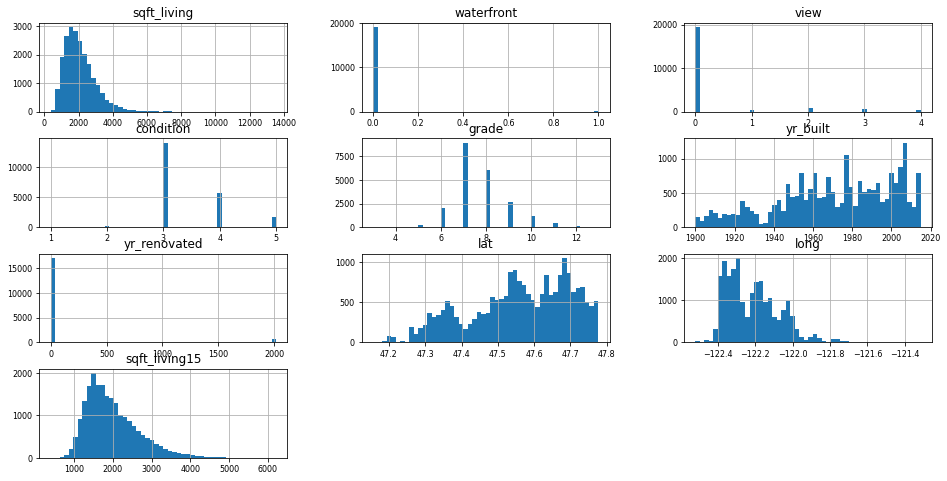

In [14]:
dist_cols = df.columns[3:]
df[dist_cols].hist(bins=50, xlabelsize=8, ylabelsize=8);

We observe a clear distinction between continuous and categorical variables:
* **continuous**
    * skewed right distribution as our target: sqft_living, sqft_above and sqft_living15
    * geographical data: three main peaks indicate, that a lot of houses are located in three geographical areas
* **categorical**
    * grade: mode at 7
    * most houses no waterfront
    * view mostly bad
    * yr_built: skewed left, relevant for us: historical houses
    * yr_renovated: skewed right. relevant for us: recent renovations

## Cleaning the data
### Dealing with nans
We assume that missing values correspond to no waterfron, bad view and no renovation. Therefore we fill all of them with the mode (0).

In [15]:
df.waterfront.fillna(df.waterfront.mode()[0], inplace=True)
df.view.fillna(df.view.mode()[0], inplace=True)
df.yr_renovated.fillna(df.yr_renovated.mode()[0], inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   sqft_living    21597 non-null  int64         
 4   waterfront     21597 non-null  float64       
 5   view           21597 non-null  float64       
 6   condition      21597 non-null  int64         
 7   grade          21597 non-null  int64         
 8   yr_built       21597 non-null  int64         
 9   yr_renovated   21597 non-null  float64       
 10  lat            21597 non-null  float64       
 11  long           21597 non-null  float64       
 12  sqft_living15  21597 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(6)
memory usage: 2.1 MB


### Removing the outliers
As we have seen, a few outliers can be removed. We remove rows with very high sale prices (above the 95th percentile):

In [16]:
df_ad = df[df.price <= df.price.quantile(q=0.95)]
df_ad.head()

,id,date,price,sqft_living,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15
0,7129300520,2014-10-13,221900.000,1180,0.000,0.000,3,7,1955,0.000,47.511,-122.257,1340
1,6414100192,2014-12-09,538000.000,2570,0.000,0.000,3,7,1951,1991.000,47.721,-122.319,1690
2,5631500400,2015-02-25,180000.000,770,0.000,0.000,3,6,1933,0.000,47.738,-122.233,2720
3,2487200875,2014-12-09,604000.000,1960,0.000,0.000,5,7,1965,0.000,47.521,-122.393,1360
4,1954400510,2015-02-18,510000.000,1680,0.000,0.000,3,8,1987,0.000,47.617,-122.045,1800


Additionally we could remove the outliers for the square footages, but we only keep those features for sanity checks and we don't work with them towards our hypothesis.

### Transform data

First we transform the yr_built to obtain a more intuitive age. Additionally we create a feature that tells us if the house is historic, if it has been renovated and if it was recently renovated. Finally we consider the month of selling for seasonal statistics.

In [17]:
df_ad['age'] = 2016 - df_ad.yr_built
df_ad['historic'] = df_ad.age > 60
df_ad['renovated'] = df_ad.yr_renovated > 0
df_ad['recently_renovated'] = df_ad.yr_renovated > 2000
df_ad['renovated_ignore'] = (2016 - df_ad.yr_renovated).replace(2016, np.nan)
df_ad['month_sold'] = df_ad.date.dt.month
df_ad.head()

,id,date,price,sqft_living,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15,age,historic,renovated,recently_renovated,renovated_ignore,month_sold
0,7129300520,2014-10-13,221900.000,1180,0.000,0.000,3,7,1955,0.000,47.511,-122.257,1340,61,True,False,False,NaN,10
1,6414100192,2014-12-09,538000.000,2570,0.000,0.000,3,7,1951,1991.000,47.721,-122.319,1690,65,True,True,False,25.000,12
2,5631500400,2015-02-25,180000.000,770,0.000,0.000,3,6,1933,0.000,47.738,-122.233,2720,83,True,False,False,NaN,2
3,2487200875,2014-12-09,604000.000,1960,0.000,0.000,5,7,1965,0.000,47.521,-122.393,1360,51,False,False,False,NaN,12
4,1954400510,2015-02-18,510000.000,1680,0.000,0.000,3,8,1987,0.000,47.617,-122.045,1800,29,False,False,False,NaN,2


We create subsets of modern houses and historic houses.

In [24]:
df_hist = df_ad[df_ad.historic]
df_modern = df_ad[df_ad.historic == False]
df_modern.head()

,id,date,price,sqft_living,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15,age,historic,renovated,recently_renovated,renovated_ignore,month_sold,price_log
3,2487200875,2014-12-09,604000.000,1960,0.000,0.000,5,7,1965,0.000,47.521,-122.393,1360,51,False,False,False,NaN,12,13.311
4,1954400510,2015-02-18,510000.000,1680,0.000,0.000,3,8,1987,0.000,47.617,-122.045,1800,29,False,False,False,NaN,2,13.142
6,1321400060,2014-06-27,257500.000,1715,0.000,0.000,3,7,1995,0.000,47.310,-122.327,2238,21,False,False,False,NaN,6,12.459
7,2008000270,2015-01-15,291850.000,1060,0.000,0.000,3,7,1963,0.000,47.410,-122.315,1650,53,False,False,False,NaN,1,12.584
8,2414600126,2015-04-15,229500.000,1780,0.000,0.000,3,7,1960,0.000,47.512,-122.337,1780,56,False,False,False,NaN,4,12.344


Price developments of assets are best described on a logarithmic scale. Buyers are willing to pay a certain percentage more for a nicer condition (e.g. 20% more). This will depend on the house price (percentage) and not on the absolute amount. Therefore we create a logarithmic price scale and check the distributions.

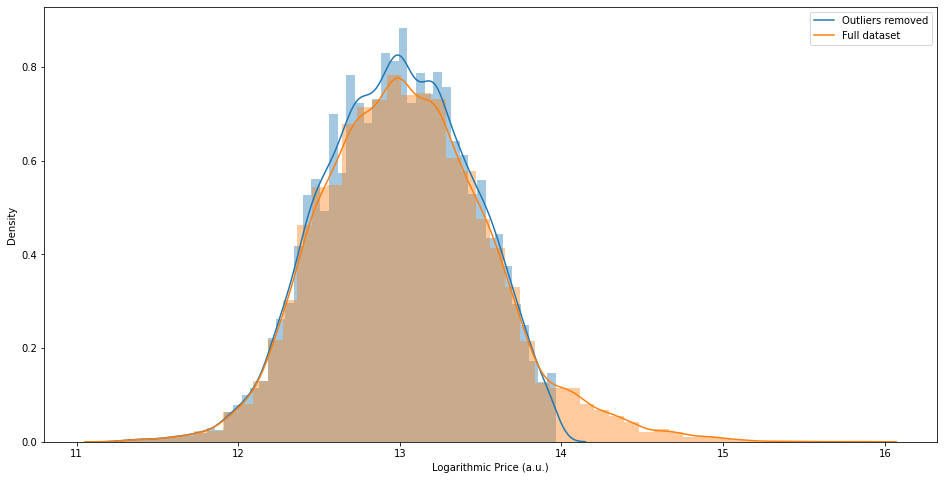

In [19]:
df['price_log'] = np.log(df.price)
df_ad['price_log'] = np.log(df_ad.price)
sns.distplot(np.log(df_ad.price))
sns.distplot(np.log(df.price))
plt.xlabel('Logarithmic Price (a.u.)')
plt.legend(['Outliers removed', 'Full dataset']);

The transformed data is closer to a normal distribution. We see the importance of removing the outliers.

### Data cleaning summary
How big is our resulting data set?

In [20]:
df_ad.groupby(['historic','renovated','recently_renovated']).size()

historic  renovated  recently_renovated
False     False      False                 14273
          True       False                    61
                     True                     76
True      False      False                  5627
          True       False                   283
                     True                    211
dtype: int64

29% (6000) of the houses are historic. Out of those, 5% (280) are renovated, most of them in the last 15 years. The dataset of renovated (historic) houses is very small.

## Relationships in the data
### Correlation matrix
First we calculate the correlation matrix. Some columns are irrelevant for us (e.g. latitude and longitude or the house id). Therefore we only save the relevant columns and we print the full matrix.

In [21]:
corr_cols = ['price','price_log','sqft_living','waterfront','view','condition','grade','age','historic','renovated_ignore']
corr_m = df_ad.corr().loc[corr_cols,corr_cols]
corr_m

,price,price_log,sqft_living,waterfront,view,condition,grade,age,historic,renovated_ignore
price,1.000,0.966,0.628,0.057,0.245,0.036,0.637,-0.063,-0.018,-0.218
price_log,0.966,1.000,0.610,0.050,0.221,0.033,0.627,-0.083,-0.033,-0.218
sqft_living,0.628,0.610,1.000,0.002,0.171,-0.074,0.710,-0.354,-0.327,-0.136
waterfront,0.057,0.050,0.002,1.000,0.279,0.010,-0.011,0.036,0.034,0.064
view,0.245,0.221,0.171,0.279,1.000,0.034,0.135,0.066,0.056,0.062
condition,0.036,0.033,-0.074,0.010,0.034,1.000,-0.171,0.354,0.208,0.362
grade,0.637,0.627,0.710,-0.011,0.135,-0.171,1.000,-0.491,-0.420,-0.263
age,-0.063,-0.083,-0.354,0.036,0.066,0.354,-0.491,1.000,0.811,0.248
historic,-0.018,-0.033,-0.327,0.034,0.056,0.208,-0.420,0.811,1.000,0.203
renovated_ignore,-0.218,-0.218,-0.136,0.064,0.062,0.362,-0.263,0.248,0.203,1.000


For visualization, we plot the correlation matrix:

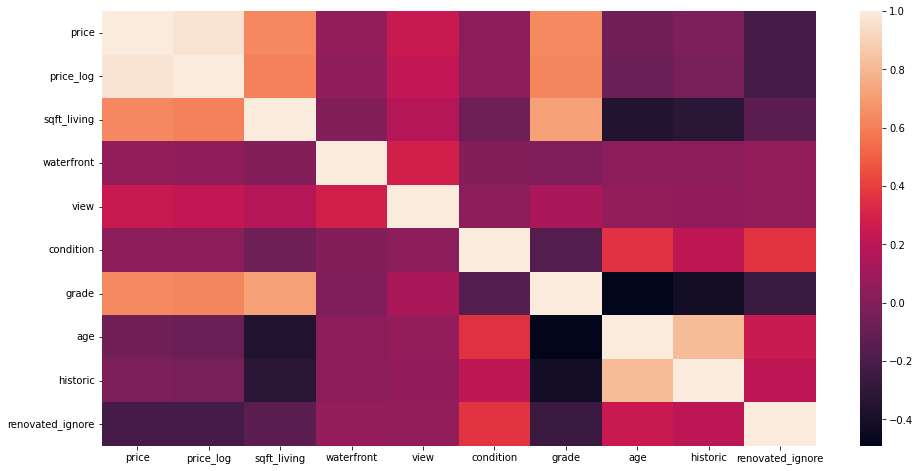

In [22]:
sns.heatmap(corr_m);

### Relationship between features and target
We observe that the logarithmic price has a negligible effect on the Pearson correlation coefficients. The square footage and the grade show the highest correlation with our target (price). If we only consider renovated houses, the year of the renovation (stored in renovated_ignore) reveals a small but existent correlation with the price.

Unexpectedly, the age shows no correlation with sale price whatsoever. In order to understand this, we compute the correlations of the historic houses subset and the modern houses subset.

In [25]:
corr_m_split = df_hist.corr().loc[['price','price_log'],corr_cols].transpose()
corr_m_split[['price_modern','price_log_modern']] = df_modern.corr().loc[['price','price_log'],corr_cols].transpose()
corr_m_split.columns = ['price_historic','price_log_historic','price_modern','price_log_modern']
corr_m_split

,price_historic,price_log_historic,price_modern,price_log_modern
price,1.000,0.960,1.000,0.969
price_log,0.960,1.000,0.969,1.000
sqft_living,0.613,0.584,0.680,0.661
waterfront,0.057,0.052,0.064,0.053
view,0.261,0.234,0.240,0.217
condition,0.176,0.192,-0.040,-0.057
grade,0.666,0.658,0.707,0.689
age,0.209,0.209,-0.201,-0.230
historic,NaN,NaN,NaN,NaN
renovated_ignore,-0.233,-0.241,-0.177,-0.132


Interestingly, both the historic and the modern houses subset feature a correlation of age and sale price! The Pearson coefficients are comparable with opposing sign.

We take a look on the relationship of the important features and the price for historic houses:

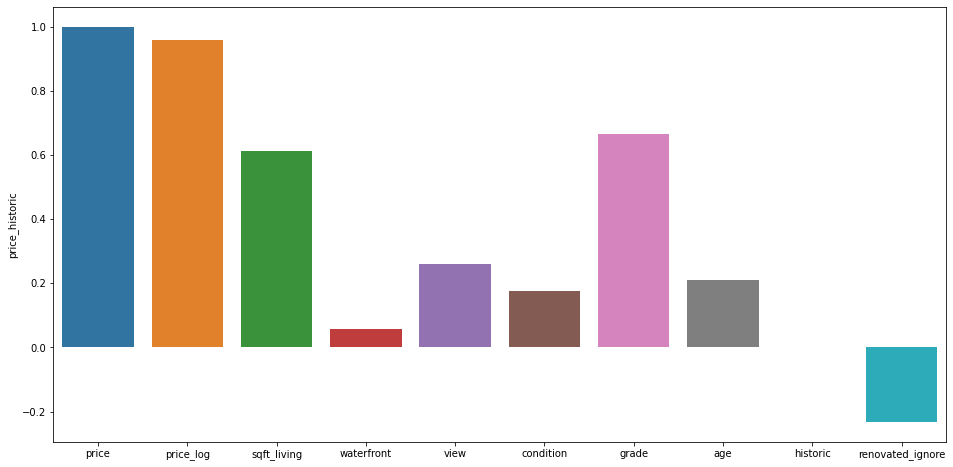

In [26]:
sns.barplot(corr_m_split.index, corr_m_split.price_historic);

Appart from the sanity check features (sqft_living and grade) which show a very strong influence on the price, our main features age and renovated_ignore show a small but non-negligible correlation with price.

### Checking our hypothesis
1. Sale price vs. house age, influence of historic? Let's look at the mean sale price per age.

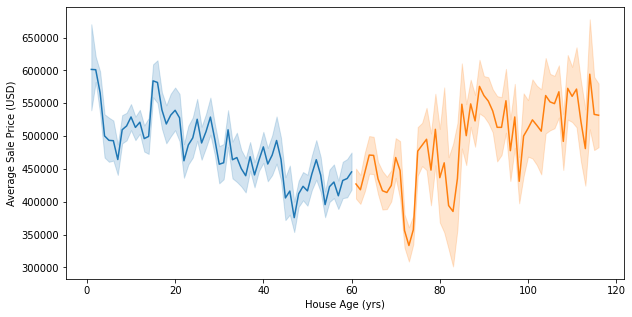

In [111]:
sns.lineplot(data=df_ad, x='age', y='price', hue='historic', legend=False)
plt.xlabel('House Age (yrs)')
plt.ylabel('Average Sale Price (USD)')
#plt.legend(['Modern Houses', 'Historic Houses'], loc='best')
plt.savefig('images/2_age_historic.png', bbox_inches='tight')

WOW! We observe a linear decrease with increasing age for modern houses and a linear increase with age for historic houses. The transition between the regimes happens around a house age of around 50 to 70 years. Our definition of historic houses seems to be reasonable and known to the market.

Note: While we observe the expected trend, we are unaware of the underlying reason. It might be that people want to live in historic houses or perhaps it is something else (working hypothesis: modern houses are bigger, have a better grade). We want to quickly cover this by considering our check features.

<AxesSubplot:xlabel='age', ylabel='grade'>

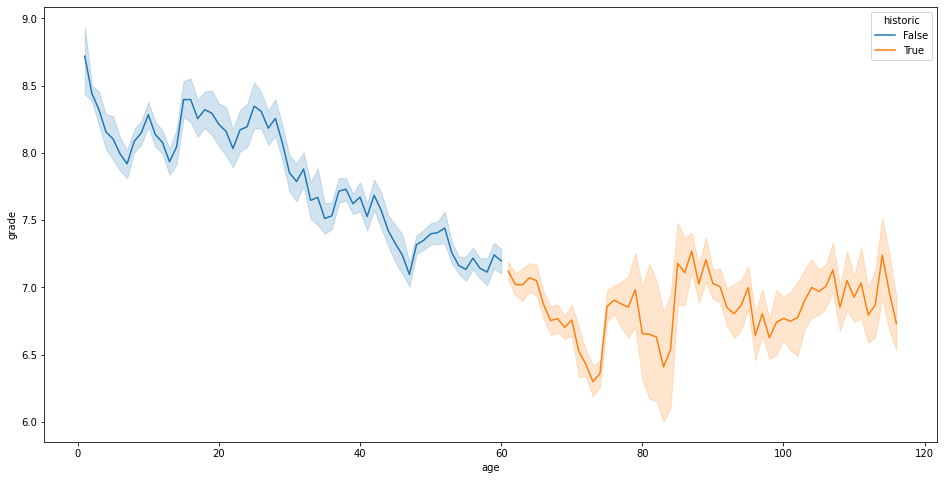

In [28]:
sns.lineplot(data=df_ad, x='age', y='grade', hue='historic')

<AxesSubplot:xlabel='age', ylabel='sqft_living'>

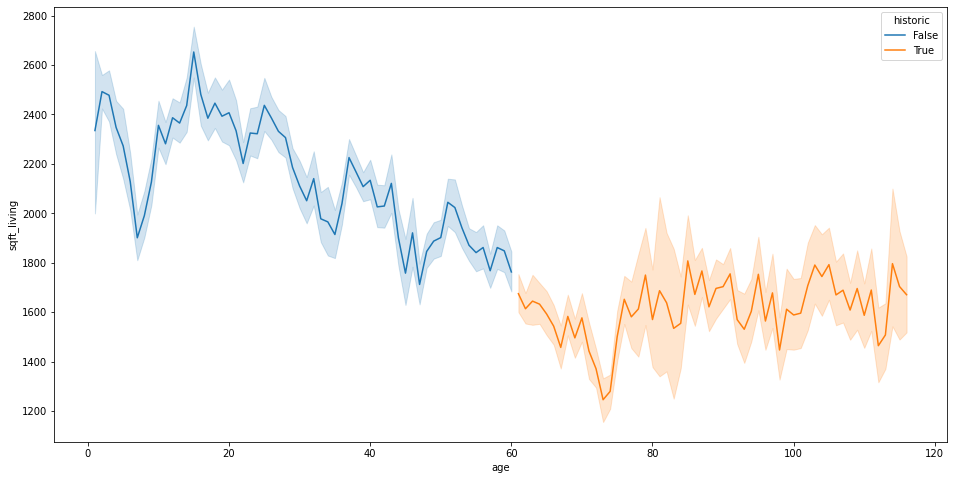

In [29]:
sns.lineplot(data=df_ad, x='age', y='sqft_living', hue='historic')

Ok, both of our working hypothesis are true for modern houses. The grade as well as the sqft_living gradually decrease with increasing house age. Since both of them are strongly correlated with price, we expect that to be the main reason for the correlation of age and price we see for modern houses.

For historic houses however, both the size as well as the grade remain approximately constant over the age. That indicates, that historic houses are indeed priced as assets by the market.

From an investment point of view, it makes sense to buy houses with age 50 to 70 years and profit from the value increase as they get older and more historic.

2. Should I renovate?

To answer this question, we look at the mean sale prices for different aged houses and compare renovated to non-renovated houses.

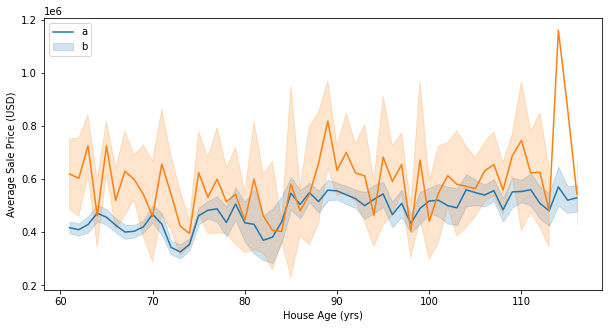

In [114]:
ax = sns.lineplot(data=df_hist, x='age', y='price', hue='renovated')
plt.xlabel('House Age (yrs)')
plt.ylabel('Average Sale Price (USD)')
ax.legend(['a', 'b'])
#plt.legend(['Modern Houses', 'Historic Houses'], loc='best')
#plt.savefig('images/2_age_historic.png', bbox_inches='tight')


We see a lot of scattering for young houses since there is not a lot of statistics. For historical houses we observe that renovated houses in average sell for more. We can calculate the mean values for historical and modern houses.

In [31]:
df_ad.groupby(['historic','renovated']).mean().price

historic  renovated
False     False       481264.649
          True        579367.803
True      False       464796.828
          True        576638.905
Name: price, dtype: float64

The overall mean price of modern houses is only slightly higher than the overall mean price of historic houses. In both cases, a renovation increases the price by almost 25%. This confirms our hypothesis. As long as the renovation is cheaper than that, it pays off. In practice, we expect a renovation to not be considerable cheaper and thus it might not be worth the hassle in general. 

3. Seasonality of house prices

We plot the average house prices per month:

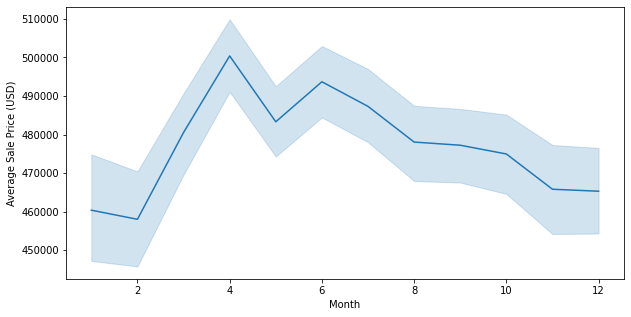

In [94]:
sns.lineplot(data=df_ad, x='month_sold', y='price')
plt.xlabel('Month')
plt.ylabel('Average Sale Price (USD)');
#plt.savefig('images/1_seasonality.png', bbox_inches='tight')

November to February yield the lowest prices. In spring and early summer, the house prices spiked. Since the dataset only covers one year, this seasonality might be due to other reasons as current money policy or governmental topics.

However, the winter months neighborhoods might look less attractive due to weather, low light and less vegetation. In contrary, in the spring sun and vegetation make houses look more appealing to buyers, rising the overall interest in the housing market. People are more likely to move end of the school year around June and July. During the winter break mobility is the lowest.

In principle, this seasonality is something a professional investor should include in their buying and selling decision.

4. Geographical 
We first have a look where expensive historical houses are located.

![](images/map_prices_historic.png)

In [137]:
fig = px.density_mapbox(df_hist, lat="lat", lon="long", z="price_log", 
                        radius=4,
                        hover_data={'lat':False, 'long':False, 'price_log':False, 'price':True, 'age':True, 'renovated':True},
                        zoom=10,
                        height=600,
                        width=600,
                        center={'lat':47.61, 'lon':-122.31},
                        title='Historic Houses Sale Prices',
                        labels={'price_log': 'Log Prices'},
                        )
fig.update_layout(mapbox_style="open-street-map",
                    margin={'r':0, 't':30, 'l':0, 'b':0},
                    )
fig.show()
fig.write_image('images/map_prices_historic.png')

Apparently, historic houses are located more central. Could that explain the price increase for old houses? Is the location of houses gradually decreasing over built year? For that, we focus on two areas in downtown Seattle which include a lot of expensive historic houses. We filter by latitude and longitude (perhaps the zip codes would be helpful here).

In [143]:
df_ad.query('47.56 < lat < 47.63 and -122.325 < long < -122.28').groupby('historic').mean()

,id,price,sqft_living,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15,age,renovated,recently_renovated,renovated_ignore,month_sold,price_log
historic,,,,,,,,,,,,,,,,,,
False,5459202358.512,511538.356,1625.962,0.000,0.135,3.108,7.814,1999.695,21.625,47.598,-122.301,1538.235,16.305,0.011,0.005,10.250,6.717,13.086
True,5320690677.645,577310.419,1832.540,0.000,0.235,3.556,7.216,1918.303,200.770,47.597,-122.299,1744.210,97.697,0.100,0.062,12.864,6.362,13.205


In [142]:
df_ad.query('47.65 < lat < 47.7 and -122.4 < long < -122.26').groupby('historic').mean()

,id,price,sqft_living,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15,age,renovated,recently_renovated,renovated_ignore,month_sold,price_log
historic,,,,,,,,,,,,,,,,,,
False,4235566321.328,566371.227,1767.079,0.000,0.122,3.073,7.930,1997.073,20.608,47.679,-122.350,1540.729,18.927,0.010,0.010,5.286,6.807,13.199
True,4839866972.151,586951.363,1634.540,0.000,0.128,3.702,7.052,1928.236,124.008,47.678,-122.340,1598.191,87.764,0.062,0.031,20.967,6.667,13.245


In area 1, historic houses sell for around 10% more, but they are also around 10% bigger. On the other hand, the grade is considerably better. In area 2, historic houses are around 8% smaller with considerable worse grade, but nevertheless sell for around 5% more. This is an interesting area for investing!

Finally, we compare spatial distribution of expensive modern houses.

![](images/map_prices_modern.png)

In [149]:
fig = px.density_mapbox(df_modern, lat="lat", lon="long", z="price_log", 
                        radius=3,
                        hover_data={'lat':False, 'long':False, 'price_log':False, 'price':True, 'age':True, 'renovated':True},
                        zoom=10,
                        height=600,
                        width=600,
                        center={'lat':47.61, 'lon':-122.31},
                        title='Modern Houses Sale Prices',
                        labels={'price_log': 'Log Prices'},
                        )
fig.update_layout(mapbox_style="open-street-map",
                    margin={'r':0, 't':30, 'l':0, 'b':0},
                    )
fig.show()
fig.write_image('images/map_prices_modern.png')

A lot of them are located in expensive suburbs. Generally, we can see that modern houses are more spread over the county.

The distribution of historic houses by age:

![](images/map_age.png)

In [81]:
#plotly
fig = px.density_mapbox(df_hist, lat="lat", lon="long", z="age", 
                        radius=5,
                        hover_data={'lat':False, 'long':False, 'price_log':False, 'price':True, 'age':True, 'renovated':True},
                        zoom=10,
                        height=500,
                        width=500,
                        center={'lat':47.61, 'lon':-122.31},
                        title='Historic Houses Age',
                        labels={'age': 'Age (yrs)'},
                        )
fig.update_layout(mapbox_style="open-street-map",
                    margin={'r':0, 't':30, 'l':0, 'b':0},
                    )
fig.show()
fig.write_image('images/map_age.png')

## Hypothesis validation and summary
1. Influence of the age

    We indeed found an influence of the house age on the sale price. When we split the dataset, we find a correlation of age and sale price which was obscured in the original dataset. The price decline of modern houses is mostly attributed to houses becoming larger and the grade improving for younger houses. For historical houses however, the price increase with house age is harder to explain.

2. Renovations

    In general, renovated houses sell for more. The seller has to consider if the value increase outweighs the renovation costs.

3. Seasonality

    The seasonality in the US house market is driven by increased mobility at the end of the school year end of May. In the winter break, the mobility is lowest. On top of that, environmental factor make houses more appealing to buyers in spring and early summer. This general trend is observed in our dataset, although it only covers the timescale of one year.

4. Location of expensive houses

    Historic houses are located in more central areas. The overvaluation of historic houses strongly depends on the neighborhood. Therefore an investor should choose the location carefully.

In [157]:
# a number of test plots that are not used in this notebook
#sns.lineplot(data=df_ad, x='age', y='price', hue='historic')
#sns.lineplot(data=df_ad, x='age', y='price', hue='renovated')
#sns.lineplot(data=df_ad, x='age', y='price', hue='recently_renovated')
#sns.scatterplot(data=df_ad, x='age', y='price', hue='renovated')
#sns.lineplot(data=df_ad, x='renovated_ignore', y='price')
#sns.lineplot(data=df_ad, x='month_sold', y='price')
#sns.lineplot(data=df_ad, x='age', y='grade', hue='historic')
#sns.lineplot(data=df_ad, x='grade', y='price')#, hue='historic')
#sns.lineplot(data=df_ad, x='renovated_ignore', y='price')
#sns.displot(data=df_ad[df_ad.renovated], x='price')#, hue='renovated')
#sns.displot(data=df_ad, x='price', hue='renovated')